In [4]:
import pandas as pd
import numpy as np  
import seaborn as sns 
pal = sns.color_palette()
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import glob
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout

In [5]:
districts_data=pd.read_csv('districts_info.csv')
districts_data.head()
districts_data.tail()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN
232,7164,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [6]:
districts_data.columns
print('lenght of data is',len(districts_data))
print('shape is', districts_data.shape)
print(districts_data.info())
print(districts_data.dtypes)


lenght of data is 233
shape is (233, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB
None
district_id                  int64
state                       object
locale                      object
pct_black/hispanic          object
pct_free/reduced            object
county_connections_ratio    object
pp_total_raw                object
dtype: object


In [7]:
# Checking Null values / missing values
np.sum(districts_data.isnull().any(axis=1))
print('Count of columns in the data is:  ', len(districts_data.columns))
print('Count of rows in the data is:  ', len(districts_data))


Count of columns in the data is:   7
Count of rows in the data is:   233


In [8]:
#Deleting the duplicate rows
current=len(districts_data)
print('Rows of data before Delecting ', current)

Rows of data before Delecting  233


In [9]:
districts_data=districts_data.drop_duplicates()

In [10]:
now=len(districts_data)
print('Rows of data before Delecting ', now)

Rows of data before Delecting  233


In [11]:
diff=current-now
print('Duplicated rows deleted ', diff)

Duplicated rows deleted  0


# Data Visualization 📝


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

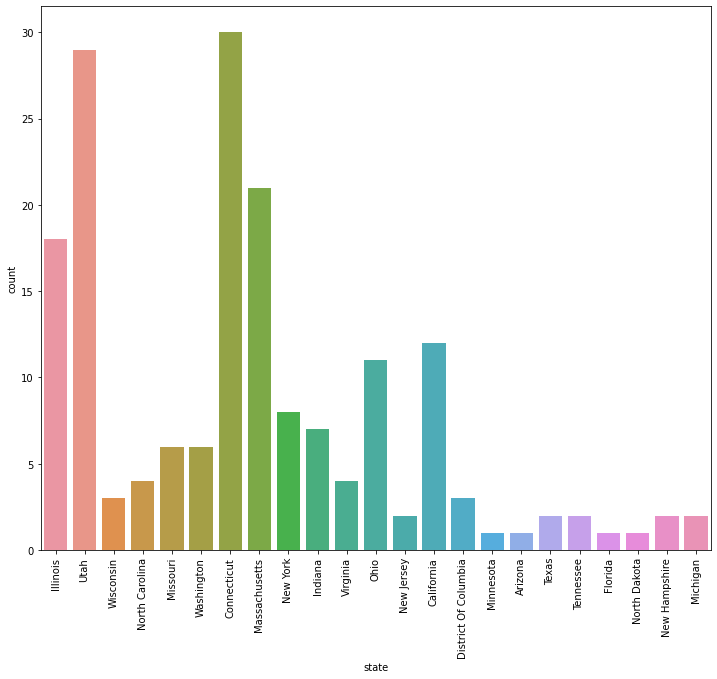

In [12]:
plt.figure(figsize=(12,10))
sns.countplot(districts_data.state)
plt.xticks(rotation=90)

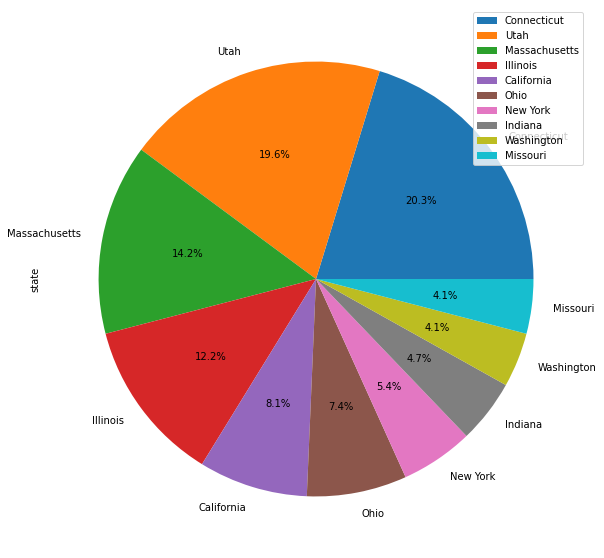

In [13]:
districts_data["state"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=
(10, 10), startangle=0).legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

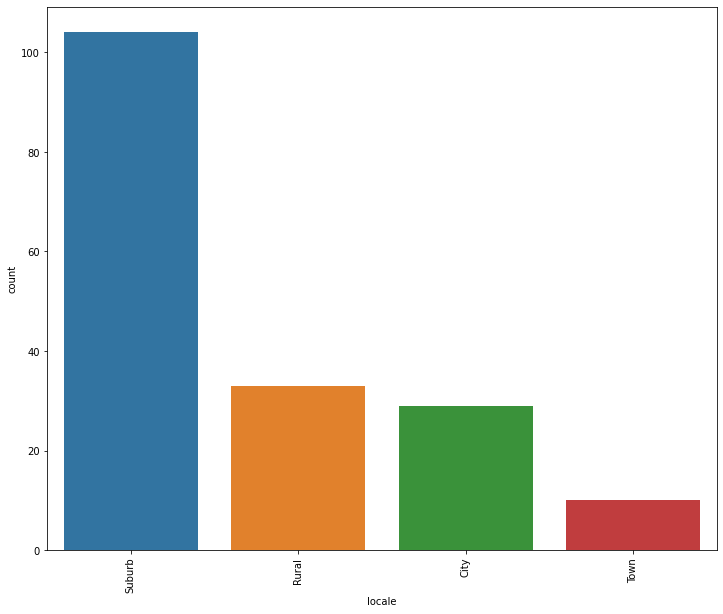

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(districts_data.locale)
plt.xticks(rotation=90)

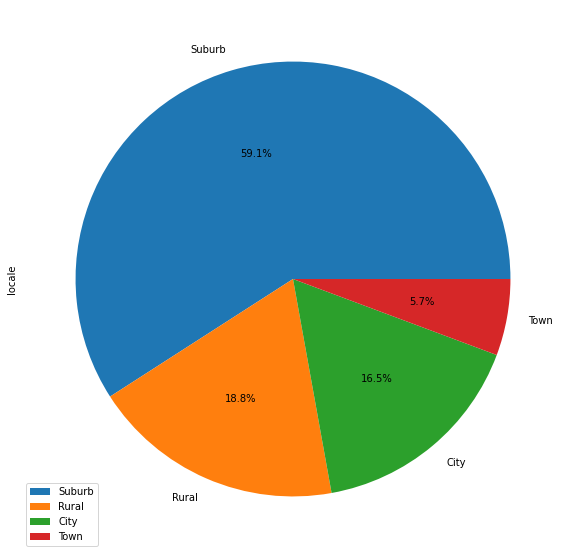

In [15]:
districts_data["locale"].value_counts().head(10).plot(
    kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

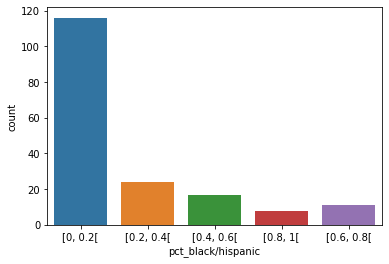

In [16]:
sns.countplot(data=districts_data,x="pct_black/hispanic")
plt.show()

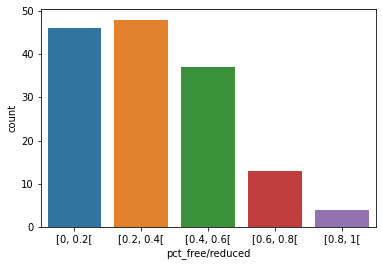

In [17]:
sns.countplot(data= districts_data, x = "pct_free/reduced")
plt.show()

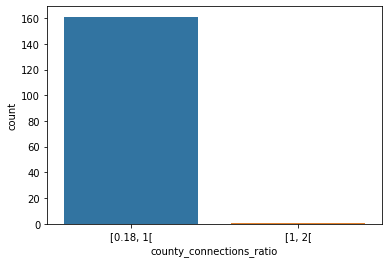

In [18]:
sns.countplot(data= districts_data, x = "county_connections_ratio")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

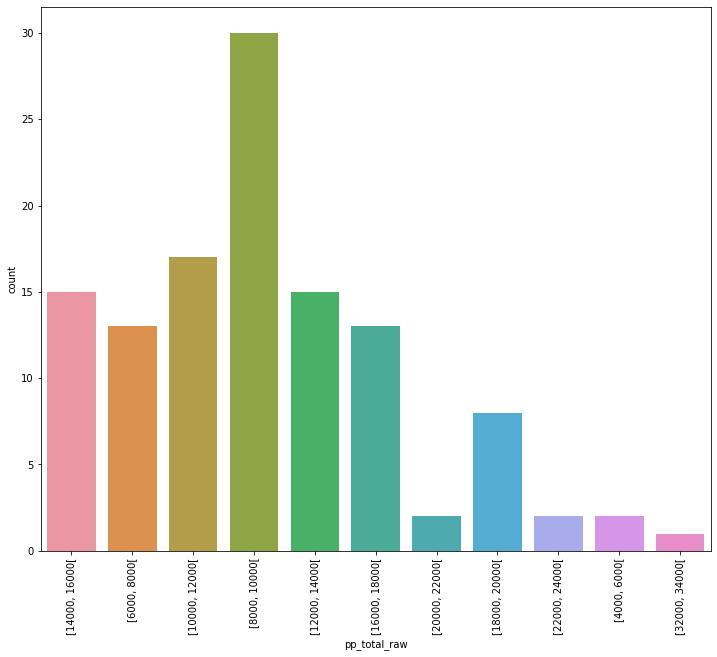

In [19]:
plt.figure(figsize=(12,10))
sns.countplot(districts_data.pp_total_raw)
plt.xticks(rotation=90)

In [20]:
products_data=pd.read_csv('products_info.csv')
products_data.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [21]:
# Distribution of Sector(s) in the District Information Data

ds=products_data['Sector(s)'].value_counts().reset_index()


In [22]:
ds.columns = [
    'Sector(s)', 
    'percent'
]
ds['percent'] /= len(products_data)

In [23]:
fig=px.pie(
    ds,
    names='Sector(s)', 
    values='percent',
    color_discrete_sequence=px.colors.sequential.Mint,
    title='Distribution of Sector(s) in the District Information Data:', 
    width=700,
    height=500
)
fig.show()

(-0.5, 1439.5, 1079.5, -0.5)

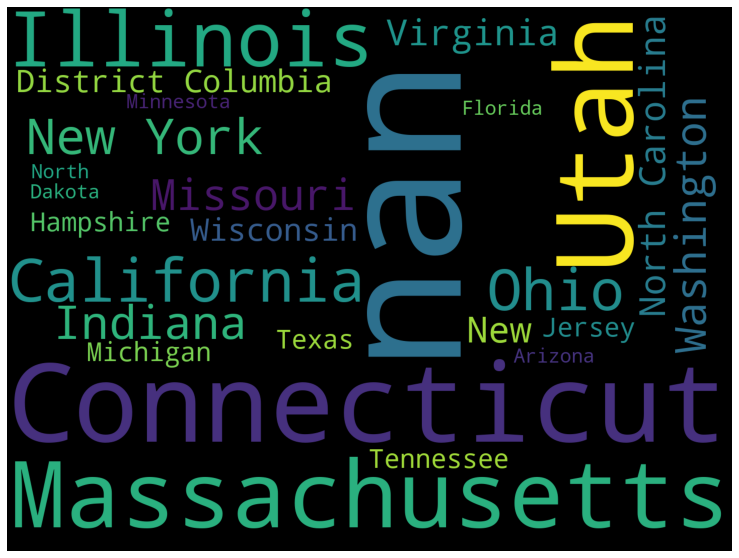

In [27]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(districts_data['state'].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [28]:
# Occurrence of states in the District Information Data

ds = districts_data['state'].value_counts().reset_index()
ds.columns = [
    'state', 
    'percent'
]
ds['percent'] /= len(districts_data)

fig = px.pie(
    ds, 
    names='state', 
    values='percent',
    color_discrete_sequence=px.colors.sequential.Mint,
    title='Occurrence of states in the District Information Data:', 
    width=700,
    height=500
)
fig.show()


In [29]:
ds = districts_data['locale'].value_counts().reset_index()
ds.columns = [
    'locale', 
    'percent'
]
ds['percent'] /= len(districts_data)

fig = px.pie(
    ds, 
    names='locale', 
    values='percent',
    color_discrete_sequence=px.colors.sequential.Mint,
    title='Occurrence of Locale in the District Information Data:', 
    width=700,
    height=500
)
fig.show()